# **Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Jaya Jaya Maju**

- Nama: Ridwan Setiawan
- Email: ridwan.setiawan@itg.ac.id
- Id Dicoding: abu_akhdan

## **1. Business Understanding**

### Permasalahan Bisnis

Jaya Jaya Maju adalah perusahaan multinasional yang telah berdiri sejak tahun 2000 dengan lebih dari 1000 karyawan. Namun, perusahaan ini menghadapi tantangan dalam mengelola SDM, khususnya tingginya tingkat attrition atau keluarnya karyawan, yang mencapai lebih dari 10%.

Tingginya tingkat attrition ini memunculkan berbagai dampak negatif terhadap stabilitas operasional dan biaya rekrutmen. Oleh karena itu, tim HR membutuhkan bantuan untuk menganalisis dan memahami faktor-faktor utama yang memengaruhi keputusan karyawan untuk keluar.

### Cakupan Proyek

Proyek ini akan mencakup hal-hal berikut:
- Eksplorasi data kepegawaian menggunakan Python dan library data science.
- Analisis faktor-faktor yang mungkin berhubungan dengan attrition, seperti lembur, pendapatan, jabatan, dan keseimbangan kerja-hidup.
- Pembuatan dashboard interaktif menggunakan Metabase untuk memantau tren attrition.
- (Opsional) Pembangunan model klasifikasi berbasis Logistic Regression untuk memperkirakan kemungkinan seorang karyawan keluar.


## **2. Persiapan**

### **a. Menyiapkan library yang dibutuhkan**

In [1]:
# ============================================
# Import Library yang Dibutuhkan
# ============================================

# Untuk manipulasi dan analisis data
import pandas as pd
import numpy as np

# Untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk preprocessing dan evaluasi model
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Untuk membangun model Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Untuk koneksi ke database PostgreSQL
from sqlalchemy import create_engine

# Untuk akses file dari Google Drive (jika menggunakan Google Colab)
from google.colab import drive

# ============================================
# Mount Google Drive agar bisa akses file CSV
# ============================================
drive.mount('/content/drive')


Mounted at /content/drive


### **b. Menyiapkan data yang akan diguankan**

- **Sumber Data**: Dataset "HR Analytics Employee Attrition & Performance" dari IBM. [Link Download](https://github.com/dicodingacademy/dicoding_dataset/tree/main/employee)
- **Tools**: Python, Jupyter Notebook, Pandas, Matplotlib, Seaborn, Scikit-Learn.
- **Visualisasi Dashboard**: Metabase via Docker.

In [2]:
# ============================================
# Memuat Dataset dari File CSV
# ============================================

# Baca file CSV dari folder di Google Drive
# Pastikan path file sesuai dengan lokasi sebenarnya
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/DICODING DS Terapan/SUB1/employee_data.csv", encoding='windows-1252')

# Tampilkan 5 baris pertama untuk memastikan data terbaca dengan benar
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## **3. Data Understanding**

### **a. Struktur dan Ringkasan Awal Data**

In [3]:
# 1. Menampilkan 5 data teratas
print("Contoh 5 baris pertama data:")
display(df.head())

Contoh 5 baris pertama data:


,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [4]:
# 2. Menampilkan info ringkas tentang kolom, tipe data, dan jumlah non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

**Info ringkas tentang kolom, tipe data, dan jumlah non-null**

Dataset ini terdiri dari 1470 baris dan 35 kolom. Dari hasil `df.info()`, seluruh kolom memiliki nilai non-null kecuali kolom `Attrition` yang tampak memiliki missing value sebanyak 412 baris. Karena `Attrition` merupakan kolom target, hal ini perlu diperiksa lebih lanjut apakah disebabkan oleh kesalahan saat pemuatan data.

Sebagian besar kolom bertipe numerik (`int64` atau `float64`), dan terdapat 8 kolom bertipe kategorikal (`object`). Data ini cukup lengkap dan bervariasi, mencakup informasi demografis, jabatan, pendapatan, dan pengalaman kerja karyawan, yang relevan untuk dianalisis lebih lanjut dalam konteks attrition.


In [5]:
# 3. Menampilkan jumlah nilai unik pada setiap kolom
print("\n Jumlah nilai unik per kolom:")
display(df.nunique())


 Jumlah nilai unik per kolom:


,0
EmployeeId,1470
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1


**Jumlah Nilai Unik per Kolom**

Analisis jumlah nilai unik per kolom memberikan gambaran awal tentang jenis dan variasi data yang terdapat dalam dataset. Berikut beberapa temuan penting dari hasil tersebut:

- Kolom seperti `EmployeeId`, `MonthlyRate`, dan `MonthlyIncome` memiliki nilai unik yang sangat tinggi (mendekati jumlah baris data), menunjukkan bahwa kolom ini bersifat sangat individual dan kemungkinan tidak memberikan kontribusi prediktif yang signifikan. Kolom seperti `EmployeeId` bahkan bersifat **identifier** dan sebaiknya dihapus saat modeling.
- Kolom `Over18`, `EmployeeCount`, dan `StandardHours` hanya memiliki **1 nilai unik**, artinya kolom ini **konstan** dan tidak membawa informasi yang berguna untuk model — kolom seperti ini biasanya akan dihapus saat preprocessing.
- Kolom target `Attrition` hanya memiliki 2 nilai unik (0 = Tidak keluar, 1 = Keluar), sesuai ekspektasi sebagai variabel klasifikasi biner.
- Beberapa kolom kategorikal memiliki variasi rendah hingga sedang:
  - `Gender` (2 nilai), `MaritalStatus` (3), `Department` (3), `BusinessTravel` (3), `JobRole` (9)
  - Ini cocok untuk di-*encode* menggunakan teknik seperti **Label Encoding** atau **One Hot Encoding** tergantung model yang digunakan.
- Fitur numerik seperti `Age`, `DistanceFromHome`, `TotalWorkingYears`, `YearsAtCompany` menunjukkan keragaman yang cukup besar (hingga 40 nilai unik), menunjukkan bahwa fitur-fitur ini dapat memiliki dampak prediktif yang lebih baik dan layak untuk dianalisis lebih lanjut.

In [6]:
# 4. Menampilkan ringkasan statistik deskriptif untuk kolom numerik
print("\n Statistik deskriptif data numerik:")
display(df.describe())


 Statistik deskriptif data numerik:


,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**Statistik Deskriptif Data Numerik**

Hasil dari `df.describe()` menunjukkan ringkasan statistik dasar untuk kolom-kolom numerik dalam dataset. Beberapa poin penting yang dapat diambil:

- **Age**: Usia karyawan berkisar antara 18 hingga 60 tahun, dengan rata-rata sekitar 37 tahun. Ini menunjukkan variasi demografis yang cukup luas.
- **DailyRate**, **MonthlyRate**, dan **HourlyRate**: Nilai minimum hingga maksimum bervariasi cukup ekstrem, namun tidak ada indikasi langsung adanya outlier dari statistik ini saja. Visualisasi lebih lanjut akan diperlukan untuk memastikannya.
- **MonthlyIncome**: Rentangnya mulai dari 1.000-an hingga hampir 20.000. Median dan mean cukup berbeda, yang bisa menunjukkan sedikit skewness atau distribusi tidak simetris.
- **YearsAtCompany**, **TotalWorkingYears**, dan **YearsWithCurrManager**: Menunjukkan distribusi pengalaman kerja yang beragam, dengan rata-rata 7–11 tahun, tetapi nilai maksimal yang sangat tinggi mengindikasikan kemungkinan adanya outlier atau nilai ekstrem.
- **TrainingTimesLastYear**: Nilainya bervariasi dari 0 sampai 6, menunjukkan sebagian besar karyawan hanya mendapat pelatihan terbatas per tahun.
- **StockOptionLevel**, **JobLevel**, dan skor seperti **JobSatisfaction**, **WorkLifeBalance**, dan **PerformanceRating**: umumnya berada dalam skala ordinal 1–4 atau 1–5, dan bisa digunakan sebagai prediktor setelah encoding.

### **b. Visualisasi Data / EDA**

#### Distribusi Kolom Target: Attrition

<ipython-input-7-f79643545a22>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_counts.index.astype(str), y=attrition_counts.values, palette='pastel')


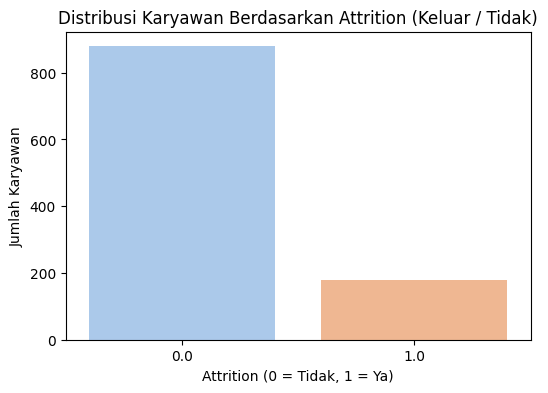

In [7]:
# Hitung jumlah karyawan yang keluar dan tidak keluar
attrition_counts = df['Attrition'].value_counts()

# Visualisasi distribusi target (attrition)
plt.figure(figsize=(6, 4))
sns.barplot(x=attrition_counts.index.astype(str), y=attrition_counts.values, palette='pastel')
plt.title('Distribusi Karyawan Berdasarkan Attrition (Keluar / Tidak)')
plt.xlabel('Attrition (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah Karyawan')
plt.show()

**Distribusi Karyawan Berdasarkan Attrition**

Visualisasi di atas menunjukkan distribusi jumlah karyawan berdasarkan status mereka dalam kolom `Attrition`, yang terdiri dari dua kategori: 0 untuk karyawan yang tetap bekerja dan 1 untuk karyawan yang keluar dari perusahaan. Dari grafik terlihat bahwa mayoritas karyawan (lebih dari 850 orang) tetap berada di perusahaan, sedangkan sekitar 180 orang keluar, yang berarti tingkat attrition berada di kisaran 12%.

Distribusi ini memperlihatkan bahwa perusahaan Jaya Jaya Maju menghadapi tantangan dalam mempertahankan sebagian karyawannya. Rasio karyawan keluar sebesar 12% merupakan sinyal penting bagi tim HR untuk melakukan evaluasi terhadap faktor-faktor penyebabnya.


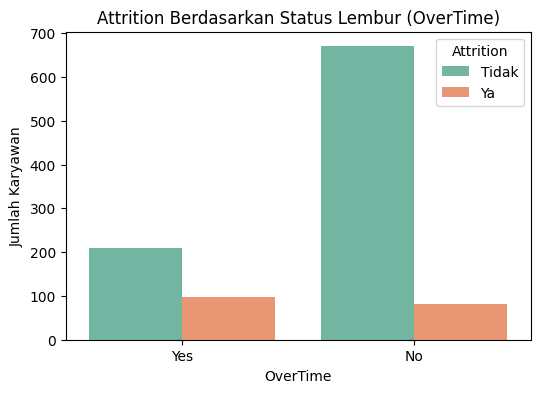

In [8]:
# ============================================
# Attrition Berdasarkan OverTime
# ============================================

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='OverTime', hue='Attrition', palette='Set2')
plt.title('Attrition Berdasarkan Status Lembur (OverTime)')
plt.xlabel('OverTime')
plt.ylabel('Jumlah Karyawan')
plt.legend(title='Attrition', labels=['Tidak', 'Ya'])
plt.show()

**Attrition Berdasarkan Status Lembur (OverTime)**

Grafik ini menunjukkan hubungan antara status lembur karyawan (`OverTime`) dan keputusan mereka untuk keluar dari perusahaan (`Attrition`).

Beberapa insight penting yang dapat diamati:

- Karyawan yang **tidak lembur (OverTime = No)** jumlahnya lebih banyak secara keseluruhan, dan sebagian besar dari mereka **tidak keluar** dari perusahaan.
- Sebaliknya, di antara karyawan yang **sering lembur (OverTime = Yes)**, proporsi yang keluar (Attrition = 1) tampak jauh **lebih tinggi dibandingkan yang tidak lembur**.
- Artinya, **karyawan yang sering lembur cenderung memiliki tingkat attrition yang lebih tinggi**, menunjukkan bahwa **lembur mungkin menjadi faktor risiko utama yang perlu diperhatikan oleh HR**.

<ipython-input-9-4a50c0eac0a3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_attr.values * 100, y=job_attr.index, palette='viridis')


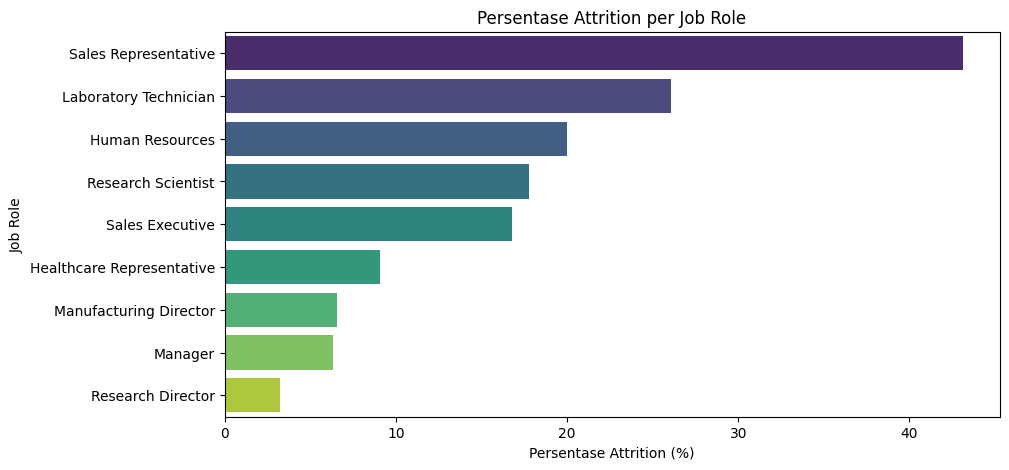

In [9]:
# ============================================
# Persentase Attrition Berdasarkan JobRole
# ============================================

# Hitung persentase attrition untuk tiap JobRole
job_attr = df.groupby('JobRole')['Attrition'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=job_attr.values * 100, y=job_attr.index, palette='viridis')
plt.title('Persentase Attrition per Job Role')
plt.xlabel('Persentase Attrition (%)')
plt.ylabel('Job Role')
plt.show()

**Persentase Attrition per Job Role**

Grafik ini menunjukkan persentase karyawan yang keluar (attrition) berdasarkan posisi pekerjaan (`JobRole`) mereka di perusahaan.

Insight penting dari grafik ini:

- **Sales Representative** memiliki persentase attrition tertinggi, melebihi 40%. Ini merupakan sinyal kuat bahwa posisi ini memiliki tantangan atau tekanan kerja tinggi yang mendorong karyawan keluar.
- Diikuti oleh **Laboratory Technician** dan **Human Resources**, yang juga menunjukkan tingkat attrition yang signifikan.
- Posisi seperti **Research Director**, **Manager**, dan **Manufacturing Director** justru menunjukkan tingkat attrition yang sangat rendah, mengindikasikan stabilitas jabatan yang lebih baik.

Grafik ini membantu mengidentifikasi **jabatan mana yang berisiko tinggi terhadap turnover**, dan bisa digunakan untuk menyusun strategi retensi yang lebih tepat sasaran, seperti pelatihan, keseimbangan kerja, atau review beban kerja.


<ipython-input-10-8aa1ce728665>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_attr.index.astype(str), y=income_attr.values, palette='coolwarm')


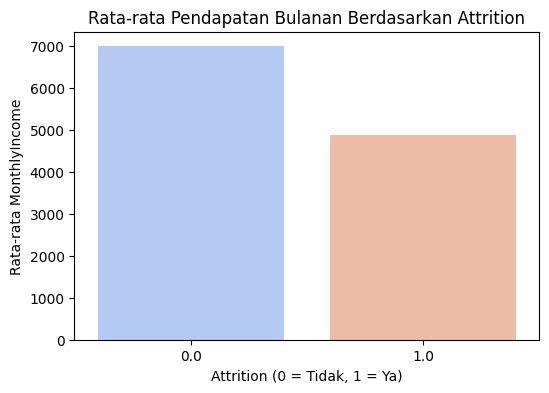

In [10]:
# ============================================
# Rata-rata Income Berdasarkan Attrition
# ============================================

income_attr = df.groupby('Attrition')['MonthlyIncome'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=income_attr.index.astype(str), y=income_attr.values, palette='coolwarm')
plt.title('Rata-rata Pendapatan Bulanan Berdasarkan Attrition')
plt.xlabel('Attrition (0 = Tidak, 1 = Ya)')
plt.ylabel('Rata-rata MonthlyIncome')
plt.show()

**Rata-rata Pendapatan Bulanan Berdasarkan Attrition**

Grafik ini memperlihatkan rata-rata pendapatan bulanan (`MonthlyIncome`) dari dua kelompok karyawan: yang keluar dari perusahaan (`Attrition = 1`) dan yang tetap bertahan (`Attrition = 0`).

Insight yang bisa disimpulkan:

- Karyawan yang **tetap bekerja** memiliki **rata-rata pendapatan sekitar 7.000**, lebih tinggi dibandingkan dengan mereka yang keluar.
- Karyawan yang **keluar** (attrition = 1) memiliki rata-rata pendapatan bulanan lebih rendah, yakni sekitar **4.800**.

Hal ini mengindikasikan bahwa **pendapatan mungkin menjadi salah satu faktor yang memengaruhi keputusan karyawan untuk keluar**. Kemungkinan lain adalah bahwa posisi/jabatan dengan gaji rendah cenderung memiliki tingkat turnover lebih tinggi.

Insight ini penting bagi HR untuk mempertimbangkan **penyesuaian kompensasi**, terutama di divisi atau peran yang rawan attrition dan memiliki pendapatan di bawah rata-rata.


## **4. Data Preparation / Preprocessing**

Sebelum data digunakan untuk pemodelan machine learning, perlu dilakukan beberapa langkah persiapan sebagai berikut:


**Menghapus Kolom Tidak Relevan**  
   Kolom seperti `EmployeeId`, `Over18`, `StandardHours`, dan `EmployeeCount` dihapus karena:
   - Tidak berpengaruh terhadap prediksi
   - Nilainya konstan atau unik

In [11]:
# 1. Menghapus kolom yang tidak diperlukan
df = df.drop(['EmployeeId', 'Over18', 'StandardHours', 'EmployeeCount'], axis=1)

**Menyesuaikan Tipe Data Kategorikal**  
   Kolom kategorikal dikonversi ke tipe `category` agar proses encoding dan analisis lebih efisien.

In [12]:
# 2. Cek dan ubah tipe data kategorikal jika belum sesuai
kategorikal = df.select_dtypes(include='object').columns.tolist()
kategorikal += ['Attrition', 'BusinessTravel', 'Department', 'EducationField',
                'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
for col in kategorikal:
    df[col] = df[col].astype('category')

**Encoding Kategorikal (One-Hot Encoding)**  
   Semua kolom kategorikal dikonversi menjadi representasi numerik menggunakan one-hot encoding (`get_dummies`).  
   Opsi `drop_first=True` digunakan untuk menghindari multikolinearitas.

In [13]:
# 3. One-hot encoding untuk data kategorikal
df_encoded = pd.get_dummies(df, drop_first=True)

**Hasil Akhir**  
   Dataset hasil encoding kini hanya mengandung nilai numerik dan siap digunakan untuk proses modeling.

In [14]:
# 4. Cek ulang hasil encoding
print("Jumlah kolom setelah encoding:", df_encoded.shape[1])
df_encoded.head()

Jumlah kolom setelah encoding: 45


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,38,1444,1,4,4,88,3,1,2,2991,...,False,False,False,False,False,False,False,True,False,True
1,37,1141,11,2,1,61,1,2,2,4777,...,False,False,False,False,False,False,False,True,False,False
2,51,1323,4,4,1,34,3,1,3,2461,...,False,False,False,False,True,False,False,True,False,True
3,42,555,26,3,3,77,3,4,2,13525,...,False,False,False,False,False,True,False,True,False,False
4,40,1194,2,4,3,98,3,1,3,2001,...,False,False,False,False,True,False,False,True,False,False


## **5. Modeling**

### **1) Split Data & Baseline Logistic Regression**

Langkah awal pada proses modeling dilakukan dengan:

1. **Pemilihan Target dan Fitur**
   - Kolom `Attrition` digunakan sebagai target (y)
   - Semua kolom lain digunakan sebagai fitur (X)

2. **Pembagian Data Latih dan Uji**
   - Data dibagi menjadi 80% data latih dan 20% data uji
   - Digunakan `stratify=y` agar proporsi kelas target tetap seimbang pada dua subset

3. **Pemodelan Awal dengan Logistic Regression**
   - Dipilih sebagai baseline karena interpretatif dan cepat dilatih
   - Parameter `max_iter=1000` untuk menghindari error konvergensi

4. **Evaluasi Awal**
   - Confusion matrix dan classification report menunjukkan metrik seperti precision, recall, dan f1-score


In [16]:
print(df_encoded.columns)


Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_1.0',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole

In [17]:
# 1. Definisikan target dan fitur
y = df_encoded["Attrition_1.0"]
X = df_encoded.drop("Attrition_1.0", axis=1)


In [18]:
# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Model training
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# 4. Evaluasi
y_pred = lr_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[258   0]
 [ 34   2]]
              precision    recall  f1-score   support

       False       0.88      1.00      0.94       258
        True       1.00      0.06      0.11        36

    accuracy                           0.88       294
   macro avg       0.94      0.53      0.52       294
weighted avg       0.90      0.88      0.84       294



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### **- Feature Scaling dengan StandardScaler**

**Perbaikan Modeling dengan Feature Scaling**

Karena Logistic Regression sensitif terhadap skala data, dilakukan normalisasi fitur numerik menggunakan `StandardScaler`.  
Semua fitur dikonversi ke skala standar (mean = 0, standar deviasi = 1) agar tidak ada fitur yang mendominasi.

Setelah scaling:
- Model dilatih ulang menggunakan data yang sudah diskalakan
- Dilakukan evaluasi ulang menggunakan confusion matrix dan classification report

Langkah ini bertujuan untuk meningkatkan **konvergensi model** dan **akurasi prediksi** terutama pada kelas minoritas (Attrition = 1).


In [19]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Scaling hanya pada fitur, bukan target
X_scaled = scaler.fit_transform(X)

# Split ulang data dengan X yang sudah diskalakan
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Train ulang Logistic Regression
lr_scaled = LogisticRegression(max_iter=1000, random_state=42)
lr_scaled.fit(X_train_scaled, y_train)

# Prediksi ulang
y_pred_scaled = lr_scaled.predict(X_test_scaled)

# Evaluasi hasil
print(confusion_matrix(y_test, y_pred_scaled))
print(classification_report(y_test, y_pred_scaled))


[[255   3]
 [ 27   9]]
              precision    recall  f1-score   support

       False       0.90      0.99      0.94       258
        True       0.75      0.25      0.38        36

    accuracy                           0.90       294
   macro avg       0.83      0.62      0.66       294
weighted avg       0.89      0.90      0.87       294



**Evaluasi Logistic Regression Setelah Feature Scaling**

Setelah fitur diskalakan menggunakan `StandardScaler`, model Logistic Regression dilatih ulang dan dievaluasi kembali.

- Confusion Matrix:
[[255 3]
[ 27 9]]



**Interpretasi:**
- Dari **36 karyawan yang keluar**, **9 berhasil diprediksi dengan benar**, naik dari hanya 2 sebelumnya.
- False positive dan false negative keduanya menurun, menunjukkan perbaikan dalam klasifikasi minoritas (`Attrition = 1`).
- Model masih bias terhadap kelas mayoritas, tapi **jauh lebih seimbang dibanding sebelumnya**.

**Classification Report:**
- **Precision kelas attrition (1)**: 0.75 (sebelumnya 1.00 tapi recall sangat rendah)
- **Recall kelas attrition (1)**: meningkat dari 0.06 → **0.25**
- **F1-score meningkat dari 0.11 → 0.38**
- **Akurasi keseluruhan stabil di 90%**, tapi sekarang lebih merepresentasikan performa model secara adil karena recall meningkat.

**Kesimpulan:**
Feature scaling berdampak positif pada model Logistic Regression, terutama dalam mengenali karyawan yang berpotensi keluar. Ini memperkuat pentingnya preprocessing untuk model berbasis jarak atau gradien.


<ipython-input-20-ea67f57b1451>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df.head(10), x='Coefficient', y='Feature', palette='coolwarm')


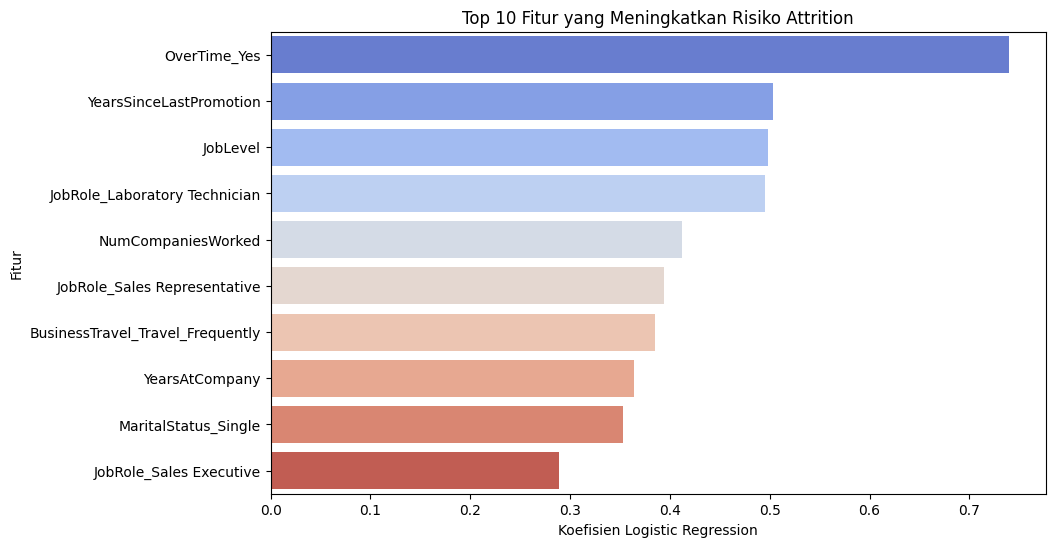

<ipython-input-20-ea67f57b1451>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df.tail(10), x='Coefficient', y='Feature', palette='coolwarm')


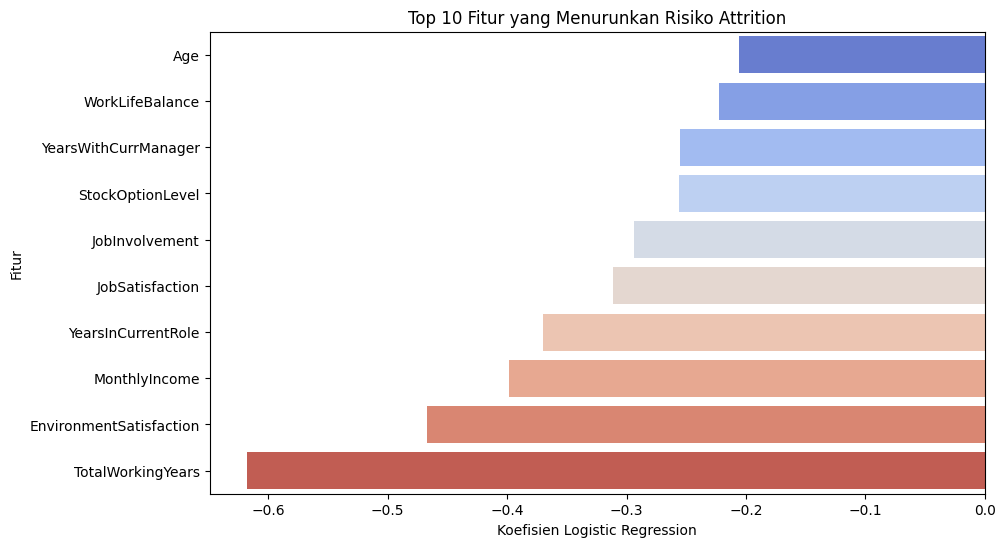

In [20]:
# Buat DataFrame dari koefisien model
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_scaled.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df.head(10), x='Coefficient', y='Feature', palette='coolwarm')
plt.title('Top 10 Fitur yang Meningkatkan Risiko Attrition')
plt.xlabel('Koefisien Logistic Regression')
plt.ylabel('Fitur')
plt.show()

# Untuk fitur negatif
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df.tail(10), x='Coefficient', y='Feature', palette='coolwarm')
plt.title('Top 10 Fitur yang Menurunkan Risiko Attrition')
plt.xlabel('Koefisien Logistic Regression')
plt.ylabel('Fitur')
plt.show()


**Visualisasi Koefisien Logistic Regression**

Grafik ini menampilkan fitur-fitur yang paling berpengaruh dalam menentukan apakah karyawan akan keluar (`Attrition = 1`) berdasarkan model Logistic Regression.

- Koefisien **positif** menunjukkan bahwa semakin besar nilai fitur tersebut, **semakin tinggi risiko karyawan keluar**.
- Koefisien **negatif** menunjukkan fitur yang **mengurangi risiko attrition**.



### **2) Training & Evaluasi Decision Tree**

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Inisialisasi dan training model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 2. Prediksi dan evaluasi
y_pred_dt = dt_model.predict(X_test)

# 3. Evaluasi
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


[[224  34]
 [ 25  11]]
              precision    recall  f1-score   support

       False       0.90      0.87      0.88       258
        True       0.24      0.31      0.27        36

    accuracy                           0.80       294
   macro avg       0.57      0.59      0.58       294
weighted avg       0.82      0.80      0.81       294



**Evaluasi Decision Tree Classifier**

Model Decision Tree dilatih pada data tanpa proses scaling, dan hasil evaluasinya dibandingkan dengan Logistic Regression.

**Confusion Matrix:**
[[224  34]
 [ 25  11]]
Interpretasi:
- Dari 36 karyawan yang keluar, model berhasil memprediksi 11 dengan benar.
- Sebanyak 34 karyawan yang tidak keluar salah diklasifikasikan sebagai keluar (false positive).
- Recall untuk kelas `Attrition = 1` adalah **0.31**, lebih tinggi dari Logistic Regression (0.25), tetapi precision rendah (0.24).

**Classification Report:**
- **Akurasi** model: 80% (lebih rendah dari Logistic Regression)
- **F1-score** untuk kelas minoritas: 0.27 (sedikit di bawah Logistic Regression setelah scaling = 0.38)
- Model cenderung mengalami **overfitting ringan**, dapat diperbaiki dengan melakukan pruning (`max_depth`)

**Kesimpulan Perbandingan:**
- Logistic Regression memberikan hasil **lebih seimbang dan stabil** setelah scaling, dengan precision dan recall yang masuk akal.
- Decision Tree mampu menangkap beberapa kasus attrition, tetapi menghasilkan **lebih banyak false positive** dan sedikit menurunkan akurasi keseluruhan.
- Untuk kebutuhan interpretasi dan kestabilan, **Logistic Regression lebih direkomendasikan** dalam konteks proyek ini.


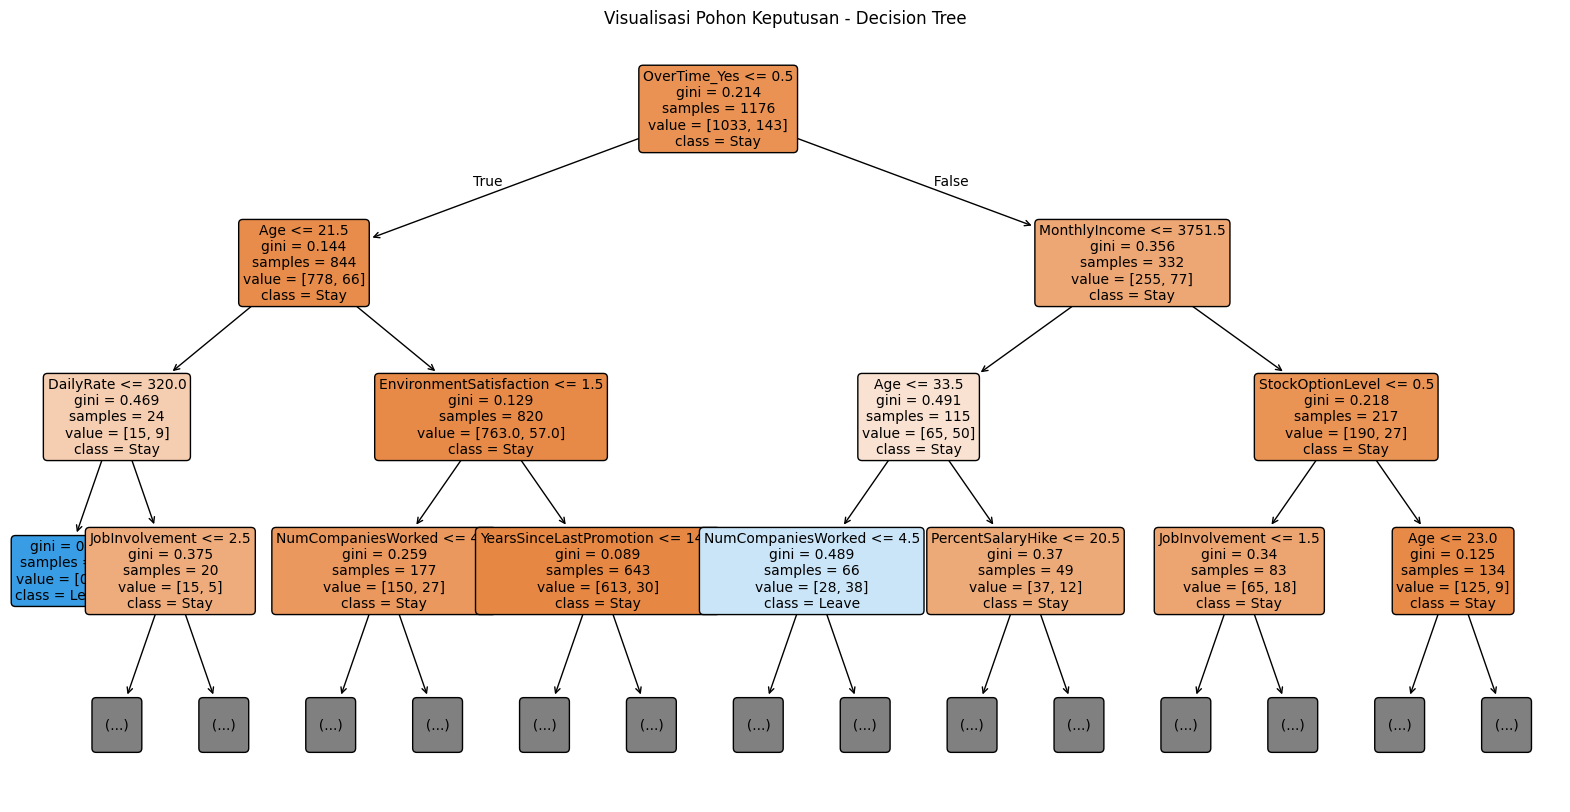

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualisasi Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    filled=True,
    feature_names=X.columns,
    class_names=["Stay", "Leave"],
    max_depth=3,           # tampilkan sampai depth 3 saja untuk kejelasan
    fontsize=10,
    rounded=True
)
plt.title("Visualisasi Pohon Keputusan - Decision Tree")
plt.show()


**Visualisasi Model Decision Tree**

Visualisasi di atas menampilkan struktur pohon keputusan yang dibentuk oleh model Decision Tree Classifier untuk memprediksi kemungkinan seorang karyawan akan keluar dari perusahaan (*Attrition = 1*).

Beberapa insight yang bisa diambil dari struktur pohon ini antara lain:

- **Fitur utama pemisah di node akar adalah `OverTime_Yes`**, yang berarti status lembur merupakan faktor paling signifikan dalam memprediksi attrition. Karyawan yang lembur memiliki kecenderungan lebih tinggi untuk keluar.
- Fitur-fitur penting lainnya yang sering muncul dalam percabangan antara lain:
  - `MonthlyIncome` (Pendapatan bulanan)
  - `Age` (Usia)
  - `EnvironmentSatisfaction` (Kepuasan terhadap lingkungan kerja)
  - `NumCompaniesWorked` (Jumlah perusahaan tempat bekerja sebelumnya)
- Setiap node menunjukkan beberapa informasi penting:
  - **gini**: ukuran ketidakmurnian klasifikasi di node tersebut (semakin kecil berarti semakin homogen).
  - **samples**: jumlah sampel (baris data) pada node tersebut.
  - **value**: jumlah label untuk kelas `Stay` dan `Leave`.
  - **class**: hasil prediksi mayoritas pada node tersebut.

Dari visualisasi ini dapat dilihat bahwa **karyawan dengan status lembur, pendapatan rendah, dan usia muda** memiliki kecenderungan lebih tinggi untuk keluar dari perusahaan.

Visualisasi ini sangat membantu dalam memahami bagaimana model mengambil keputusan, serta mendukung proses identifikasi faktor-faktor risiko yang dapat dikendalikan oleh pihak HR untuk mengurangi tingkat attrition.


## **6. Evaluation**

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

# === Logistic Regression (Setelah Scaling) ===
y_pred_logreg = lr_scaled.predict(X_test_scaled)

print("==== Logistic Regression (setelah Scaling) ====")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))

# === Decision Tree ===
y_pred_dt = dt_model.predict(X_test)

print("\n==== Decision Tree ====")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))


==== Logistic Regression (setelah Scaling) ====
Confusion Matrix:
[[255   3]
 [ 27   9]]

Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.99      0.94       258
        True       0.75      0.25      0.38        36

    accuracy                           0.90       294
   macro avg       0.83      0.62      0.66       294
weighted avg       0.89      0.90      0.87       294


==== Decision Tree ====
Confusion Matrix:
[[224  34]
 [ 25  11]]

Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.87      0.88       258
        True       0.24      0.31      0.27        36

    accuracy                           0.80       294
   macro avg       0.57      0.59      0.58       294
weighted avg       0.82      0.80      0.81       294




Setelah melatih dan mengevaluasi dua model yaitu **Logistic Regression (dengan scaling)** dan **Decision Tree**, berikut adalah perbandingan performa keduanya berdasarkan metrik klasifikasi:

| Model                          | Accuracy | Precision (Attrition) | Recall (Attrition) | F1-Score (Attrition) |
|-------------------------------|----------|------------------------|---------------------|-----------------------|
| Logistic Regression (scaled)  | 90%      | 0.75                   | 0.25                | 0.38                  |
| Decision Tree                 | 80%      | 0.24                   | 0.31                | 0.27                  |

**Analisis:**
- **Logistic Regression** menunjukkan akurasi keseluruhan yang lebih tinggi, dan f1-score yang lebih baik dalam mengenali karyawan yang keluar.
- **Decision Tree** memiliki recall sedikit lebih tinggi untuk kelas minoritas, tetapi precision dan f1-score-nya jauh lebih rendah.
- Decision Tree juga menghasilkan lebih banyak **false positive**, menurunkan stabilitas prediksi.

**Kesimpulan:**
Berdasarkan metrik yang tersedia, **Logistic Regression dengan feature scaling** menjadi pilihan terbaik untuk proyek ini. Model ini lebih stabil dan memiliki keseimbangan yang lebih baik antara akurasi dan generalisasi terhadap kelas minoritas (Attrition).


## **7. Conclusion**

Berdasarkan hasil eksplorasi data, visualisasi dashboard, dan analisis menggunakan model data science, diperoleh beberapa insight penting yang dapat membantu tim HR dalam menangani tingginya tingkat attrition di perusahaan Jaya Jaya Maju:

1. **OverTime (lembur)** adalah faktor paling signifikan yang berhubungan dengan attrition. Karyawan yang lembur menunjukkan tingkat attrition lebih dari 20%, jauh di atas rata-rata.
2. **Job Role (Jabatan)** juga memiliki pengaruh besar. Posisi seperti `Sales Representative` dan `Laboratory Technician` memiliki persentase attrition tertinggi dibandingkan jabatan lain.
3. **Monthly Income (Pendapatan Bulanan)** menjadi indikator kuat. Karyawan yang keluar memiliki pendapatan rata-rata lebih rendah dibandingkan yang bertahan.
4. Visualisasi pada dashboard menunjukkan bahwa variabel-variabel lain seperti `WorkLifeBalance`, `EnvironmentSatisfaction`, dan `TotalWorkingYears` juga memberikan kontribusi terhadap keputusan karyawan untuk keluar.

Melalui insight ini, tim HR dapat menyusun strategi intervensi seperti:
- Menyusun ulang kebijakan lembur dan workload
- Memberikan insentif atau pelatihan khusus pada posisi dengan turnover tinggi
- Melakukan evaluasi kompensasi untuk posisi rentan

Dashboard interaktif yang dibuat menggunakan Metabase juga dapat digunakan secara berkala untuk memantau kondisi attrition dan mengevaluasi efektivitas kebijakan SDM yang diterapkan.

Proyek ini menunjukkan bahwa penerapan data science dapat memberikan kontribusi nyata dalam proses pengambilan keputusan strategis di bidang Human Resources.

In [24]:
# Menghasilkan requirements.txt
!pip freeze > requirements.txt

# Mengunduh requirements.txt
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
import joblib

# Simpan model logistic regression setelah scaling
joblib.dump(lr_scaled, 'model_lr_scaled.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']